<a href="https://colab.research.google.com/github/opasniyzapuper/mldl1/blob/main/%D0%9B%D0%90%D0%91_1_%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%A0%D0%BE%D0%B6%D0%BE%D0%BA_%D0%98%D0%A310_91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключаем библиотеки для работы с данными. Загружаем выбранный датасет с гугл диска (https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility).

In [ ]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', sep=',')

data.head(5)

Mounted at /content/drive


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Проведем анализ датасета.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Посмотрим кол-во летальных исходов

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


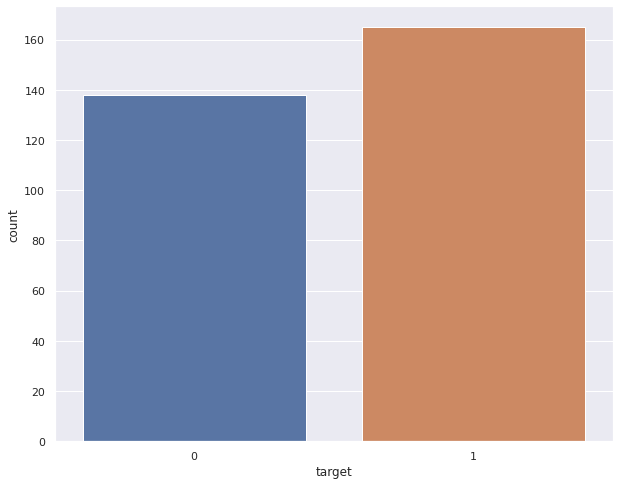

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data['target'])
plt.show()

В данном датасете больше людей, которые погибли, в результате болезни сердца

Пустых значений нет, тип данных целочисленный, текстовых типов данных, затрудныющих машииное обучение не обнаружено.

Проведем корреляционный анализ, построим графическое представление модуля значения корреляции попарно между признаками.

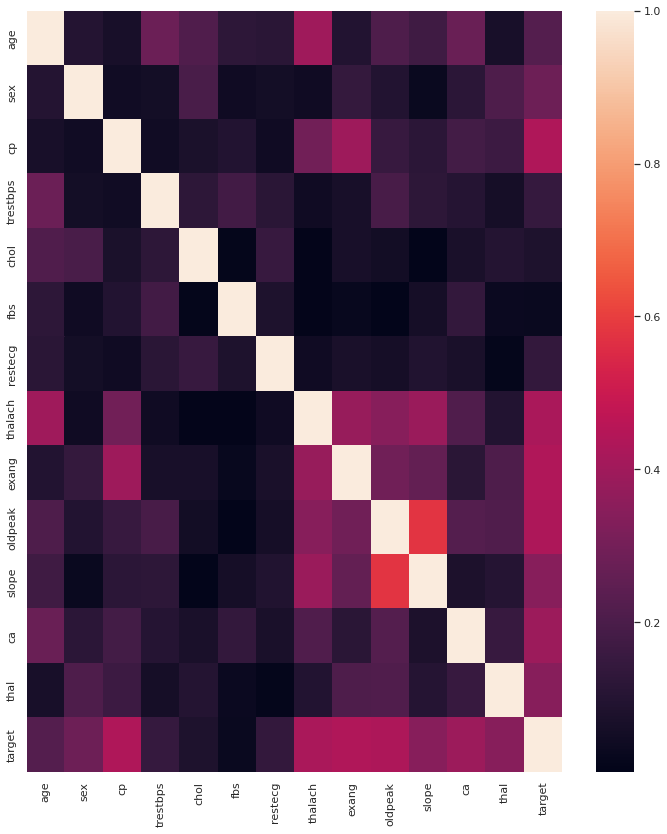

In [ ]:
# Картинку отрисуем с помощью библиотеки seaborn
# Подсчитаем корреляцию и возьмем модуль от нее
corr = data.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(12, 14)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Наибольшая корреляция у признаков "oldpeak" и "slope". Исключаем один из них.

In [ ]:
data = data.drop(['oldpeak'], axis='columns')

Посмотрим на типы данных в нашей таблице.

In [ ]:
data.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

Выбираем целевую переменную, делим наш датасет на тестовый и тренировочный

In [ ]:
X = data[data.columns[:-1]]
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Применяем метод ближайших соседей. Количество соседей пусть будет равно 5.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6973684210526315

Производим построение графиков.

[1.0, 0.7973568281938326, 0.8061674008810573, 0.7709251101321586, 0.7533039647577092, 0.73568281938326, 0.7577092511013216, 0.7312775330396476, 0.73568281938326, 0.7224669603524229, 0.7268722466960352, 0.7048458149779736, 0.7004405286343612, 0.7048458149779736, 0.6960352422907489, 0.6872246696035242, 0.6872246696035242, 0.6916299559471366, 0.6960352422907489, 0.7048458149779736, 0.6960352422907489, 0.6828193832599119, 0.6740088105726872, 0.6740088105726872, 0.6828193832599119, 0.6828193832599119, 0.6916299559471366, 0.6784140969162996, 0.7004405286343612, 0.6828193832599119, 0.6740088105726872, 0.6696035242290749, 0.6651982378854625, 0.6696035242290749, 0.6696035242290749, 0.6696035242290749, 0.6475770925110133, 0.6651982378854625, 0.6696035242290749, 0.6696035242290749, 0.6696035242290749, 0.6651982378854625, 0.6651982378854625, 0.6607929515418502, 0.6651982378854625, 0.6607929515418502, 0.6563876651982379, 0.6563876651982379, 0.6387665198237885]
[0.5526315789473685, 0.552631578947368

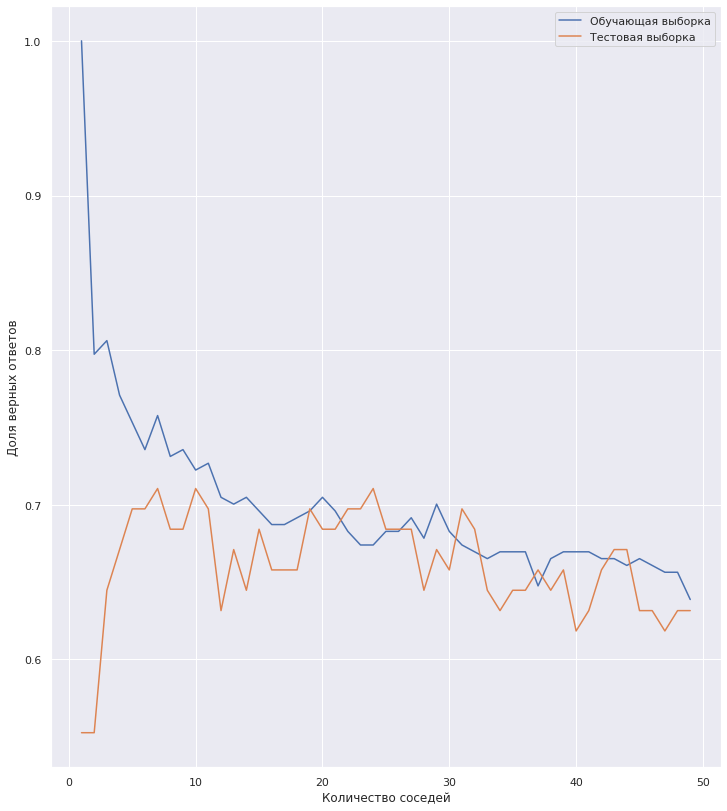

In [ ]:
train_scores = []
test_scores = []
keys_train = []
keys_test = []

for n in range(1, 50):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    train_scores.append(current_train_score)
    test_scores.append(current_test_score)
    keys_train.append(n)
    keys_test.append(n)
    
print(train_scores)
print(test_scores)
plt.plot(keys_train, train_scores, label='Обучающая выборка')
plt.plot(keys_test, test_scores, label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Из графика видно, что наибольшая доля верных ответов достигается при 23 соседях.

Вывод: маленькая доля верных ответов получается из-за того, что среди множества признаков трудно подобрать подходящие и определить, какие наиболее важны. 